<a href="https://colab.research.google.com/github/hareeshrp/Projects/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')



In [ ]:
#Loading data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [ ]:
#Store the data to data file
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-16,425.760010,437.959991,425.179993,436.130005,436.130005,5507900
1,2020-06-17,441.820007,450.459991,439.220001,447.769989,447.769989,6529600
2,2020-06-18,448.730011,452.760010,442.799988,449.869995,449.869995,4277600
3,2020-06-19,449.119995,453.970001,445.600006,453.720001,453.720001,5934500
4,2020-06-22,455.010010,468.589996,454.209991,468.040009,468.040009,6272100
5,2020-06-23,466.500000,474.010010,464.500000,466.260010,466.260010,5948400


In [ ]:
#Get the no. of trading days
df.shape

(252, 7)

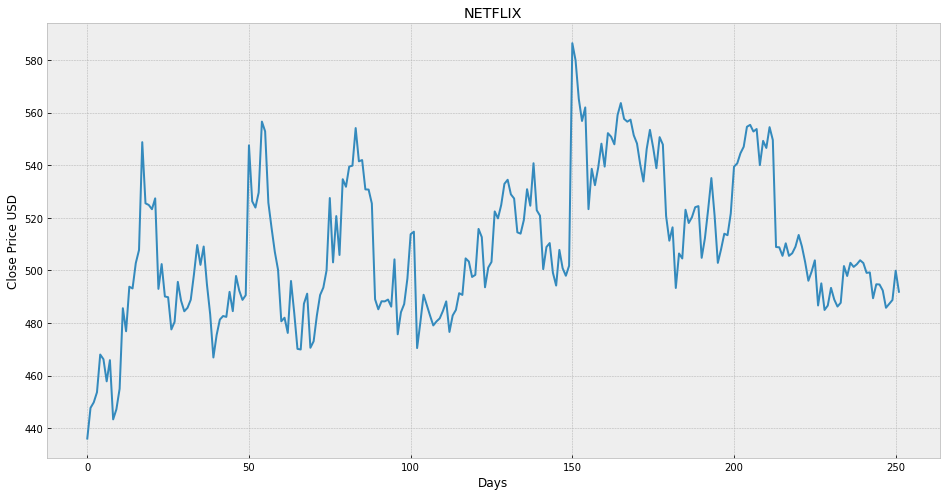

In [ ]:
#Visualize close price data
plt.figure(figsize=(16,8))
plt.title('NETFLIX')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.show()

In [ ]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,436.130005
1,447.769989
2,449.869995
3,453.720001


In [ ]:
#Create a variable to predict x days out into future
future_days = 25
#create a new column(target) shifted x units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)




,Close,Prediction
248,487.269989,NaN
249,488.769989,NaN
250,499.890015,NaN
251,491.899994,NaN


In [ ]:
#create the feature data set X and convert it into a numpy array and remove the last X rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[436.130005]
 [447.769989]
 [449.869995]
 [453.720001]
 [468.040009]
 [466.26001 ]
 [457.850006]
 [465.910004]
 [443.399994]
 [447.23999 ]
 [455.040009]
 [485.640015]
 [476.890015]
 [493.809998]
 [493.160004]
 [502.779999]
 [507.76001 ]
 [548.72998 ]
 [525.5     ]
 [524.880005]
 [523.26001 ]
 [527.390015]
 [492.98999 ]
 [502.410004]
 [490.100006]
 [489.820007]
 [477.579987]
 [480.450012]
 [495.649994]
 [488.51001 ]
 [484.480011]
 [485.799988]
 [488.880005]
 [498.619995]
 [509.640015]
 [502.109985]
 [509.079987]
 [494.730011]
 [483.380005]
 [466.929993]
 [475.470001]
 [481.329987]
 [482.679993]
 [482.350006]
 [491.869995]
 [484.529999]
 [497.899994]
 [492.309998]
 [488.809998]
 [490.579987]
 [547.530029]
 [526.27002 ]
 [523.890015]
 [529.559998]
 [556.549988]
 [552.840027]
 [525.75    ]
 [516.049988]
 [507.019989]
 [500.190002]
 [480.670013]
 [482.029999]
 [476.26001 ]
 [495.98999 ]
 [483.859985]
 [470.200012]
 [469.959991]
 [487.350006]
 [491.170013]
 [470.609985]
 [473.079987]
 [482.

In [ ]:
#Create target dataset Y and convert it into a numpy array and get all of the target values expect the last X rows
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[489.820007 477.579987 480.450012 495.649994 488.51001  484.480011
 485.799988 488.880005 498.619995 509.640015 502.109985 509.079987
 494.730011 483.380005 466.929993 475.470001 481.329987 482.679993
 482.350006 491.869995 484.529999 497.899994 492.309998 488.809998
 490.579987 547.530029 526.27002  523.890015 529.559998 556.549988
 552.840027 525.75     516.049988 507.019989 500.190002 480.670013
 482.029999 476.26001  495.98999  483.859985 470.200012 469.959991
 487.350006 491.170013 470.609985 473.079987 482.880005 490.649994
 493.480011 500.029999 527.51001  503.059998 520.650024 505.869995
 534.659973 531.789978 539.440002 539.809998 554.090027 541.450012
 541.940002 530.789978 530.719971 525.419983 489.049988 485.230011
 488.279999 488.23999  488.929993 486.23999  504.209991 475.73999
 484.119995 487.220001 496.950012 513.76001  514.72998  470.5
 480.23999  490.76001  486.769989 482.839996 479.100006 480.630005
 481.790009 484.670013 488.23999  476.619995 482.880005 485.
 491.35

In [ ]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#Create the models
#Create the decision tree regressive model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)


In [ ]:
#Get the last X rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[544.530029],
       [546.98999 ],
       [554.580017],
       [555.309998],
       [552.780029],
       [553.72998 ],
       [540.02002 ],
       [549.219971],
       [546.539978],
       [554.440002],
       [549.570007],
       [508.899994],
       [508.779999],
       [505.549988],
       [510.299988],
       [505.549988],
       [506.519989],
       [509.      ],
       [513.469971],
       [509.109985],
       [503.179993],
       [496.079987],
       [499.549988],
       [503.839996],
       [486.690002]])

In [ ]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)


[513.390015 484.980011 502.899994 502.899994 531.789978 486.279999
 487.700012 501.670013 497.890015 502.899994 501.339996 556.52002
 503.859985 501.024994 499.079987 501.024994 489.429993 494.73999
 494.660004 482.029999 586.340027 487.269989 488.769989 499.890015
 491.899994]


In [ ]:
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[517.77770051 518.24139736 519.67209957 519.80969927 519.33280607
 519.5118696  516.92757444 518.66174353 518.15657116 519.64570707
 518.72772449 511.06152286 511.03890408 510.43005462 511.32541843
 510.43005462 510.61289752 511.08037375 511.92295276 511.10110567
 509.98331615 508.64498174 509.29906876 510.10772516 506.87499169]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


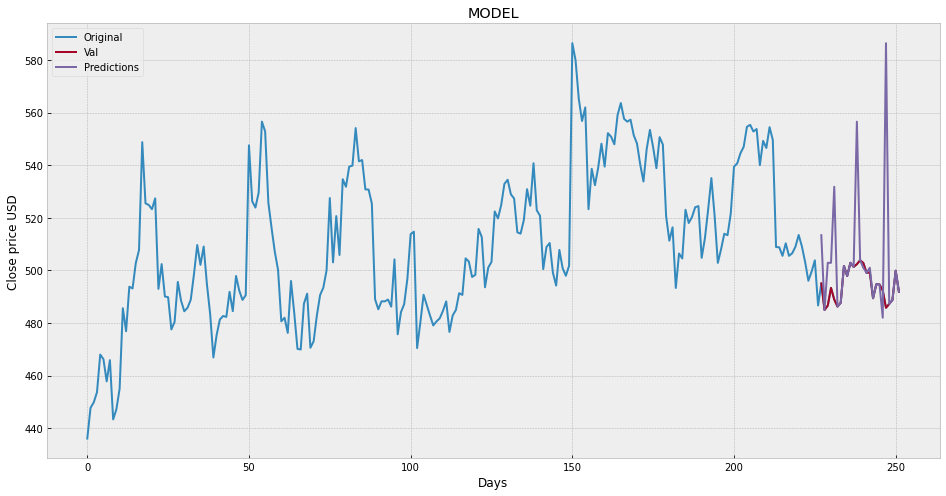

In [ ]:
#Visualize the data
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('MODEL')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Val', 'Predictions'])
plt.show()